## XGB on wine

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=150, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=5, enable_categorical=True, num_class=3)
xgb_classifier.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:0.98276
[1]	validation_0-mlogloss:0.88608
[2]	validation_0-mlogloss:0.80343
[3]	validation_0-mlogloss:0.73513
[4]	validation_0-mlogloss:0.67247
[5]	validation_0-mlogloss:0.61995
[6]	validation_0-mlogloss:0.57327
[7]	validation_0-mlogloss:0.52851
[8]	validation_0-mlogloss:0.48837
[9]	validation_0-mlogloss:0.45549
[10]	validation_0-mlogloss:0.42282
[11]	validation_0-mlogloss:0.39290
[12]	validation_0-mlogloss:0.36978
[13]	validation_0-mlogloss:0.34524
[14]	validation_0-mlogloss:0.32355
[15]	validation_0-mlogloss:0.30560
[16]	validation_0-mlogloss:0.28855
[17]	validation_0-mlogloss:0.27168
[18]	validation_0-mlogloss:0.25595
[19]	validation_0-mlogloss:0.24220
[20]	validation_0-mlogloss:0.22911
[21]	validation_0-mlogloss:0.21693
[22]	validation_0-mlogloss:0.20657
[23]	validation_0-mlogloss:0.19757
[24]	validation_0-mlogloss:0.18955
[25]	validation_0-mlogloss:0.18299
[26]	validation_0-mlogloss:0.17603
[27]	validation_0-mlogloss:0.17008
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_class=3, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

In [ ]:
xgb_classifier.score(X_train, y_train)

1.0

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

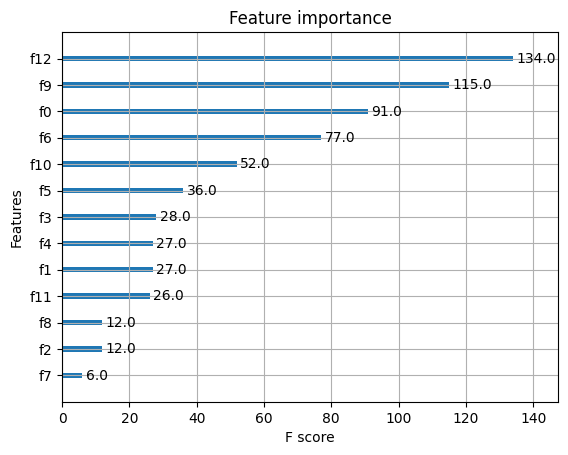

In [ ]:
xgb.plot_importance(xgb_classifier, ylabel='Features')

In [ ]:
a=0
for w in wine.feature_names:
  print(w,a)
  a+=1


alcohol 0
malic_acid 1
ash 2
alcalinity_of_ash 3
magnesium 4
total_phenols 5
flavanoids 6
nonflavanoid_phenols 7
proanthocyanins 8
color_intensity 9
hue 10
od280/od315_of_diluted_wines 11
proline 12


## Grid Search to find best params

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)
train_score, test_score = model.score(X_train, y_train), model.score(X_test, y_test)
train_score, test_score

(1.0, 0.9777777777777777)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

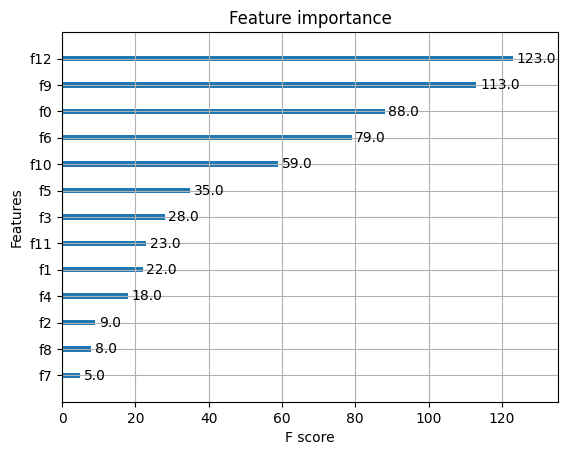

In [ ]:
xgb.plot_importance(model, ylabel='Features', show_values=True)

In [ ]:
a=0
for w in wine.feature_names:
  print(w,a)
  a+=1


alcohol 0
malic_acid 1
ash 2
alcalinity_of_ash 3
magnesium 4
total_phenols 5
flavanoids 6
nonflavanoid_phenols 7
proanthocyanins 8
color_intensity 9
hue 10
od280/od315_of_diluted_wines 11
proline 12
